In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 전처리

In [2]:
df = pd.read_csv("./data/서울시 학원 교습소정보.csv", encoding='euc-kr')
def f1(x):
    if x!=x:
        return np.nan
    else:
        return int(str(x)[:4])
    
df['개설년도'] = df['등록일자'].apply(f1)

# 2023년도 이전에 개설된 학원만
df = df.loc[df['개설년도']<=2023]
print(df.shape)
df.head()

(24527, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,", 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)",종합(대),NaN,"전산회계,컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",NaN,...,Y,N,2490,개원,19681227,NaN,99991231.0,19681227,20231018,1968
1,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,", 3층 일부 (제기동, 경동시장)",직업기술,산업기반기술,"전자,",전자,...,Y,N,2571,개원,19680210,NaN,99991231.0,19680210,20231018,1968
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,", 3층 301호 (휘경동, 민족통일빌딩)",예능(대),예능(중),"음악,",음악,...,Y,N,2445,개원,19720630,NaN,99991231.0,19720630,20231018,1972
3,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,", 2층,3층 (신설동)",직업기술,산업기반기술,NaN,자동차,...,Y,N,130811,개원,19720501,NaN,99991231.0,19720501,20231018,1972
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층 (묵동),입시.검정 및 보습,보통교과,"보습,",보습,...,N,N,2008,개원,19881102,NaN,99991231.0,19881102,20231018,1988


# 서울시내 전체 학원

## 분야별 학원 수

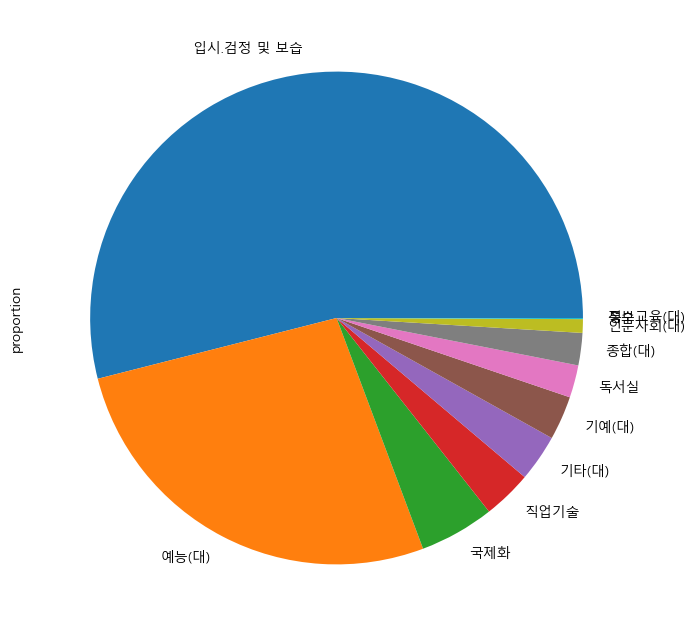

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
_=df['분야명'].value_counts(normalize=True).plot.pie(ax = ax)

## 교습계열별 학원 수

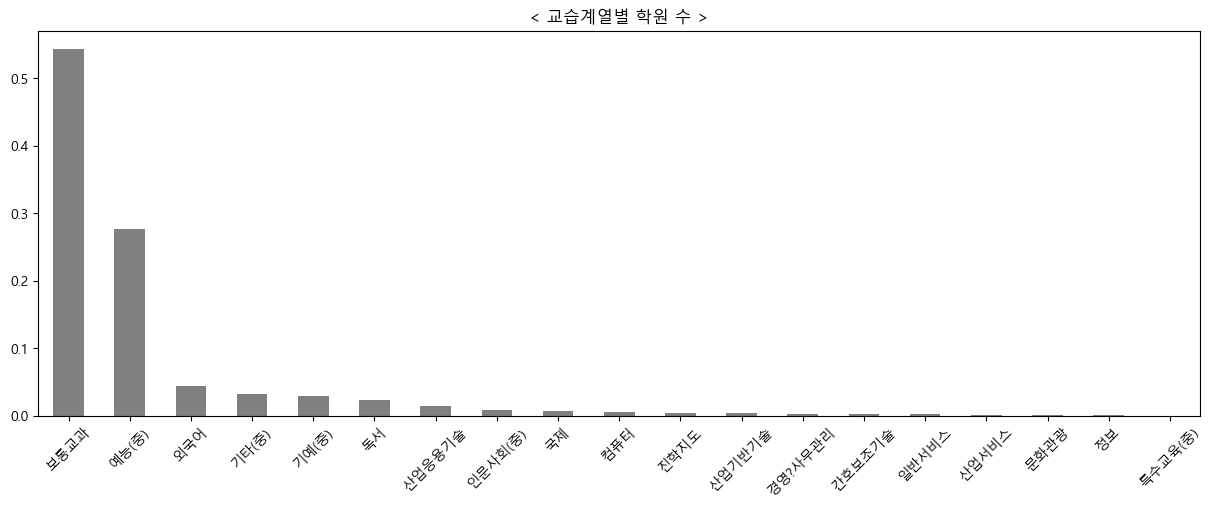

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['교습계열명'].value_counts(normalize=True).plot.bar(color='grey', ax=ax)
_=plt.xticks(rotation=45)
_=plt.xlabel("")
_=plt.title("< 교습계열별 학원 수 >")

## 연도별 개설 학원 수

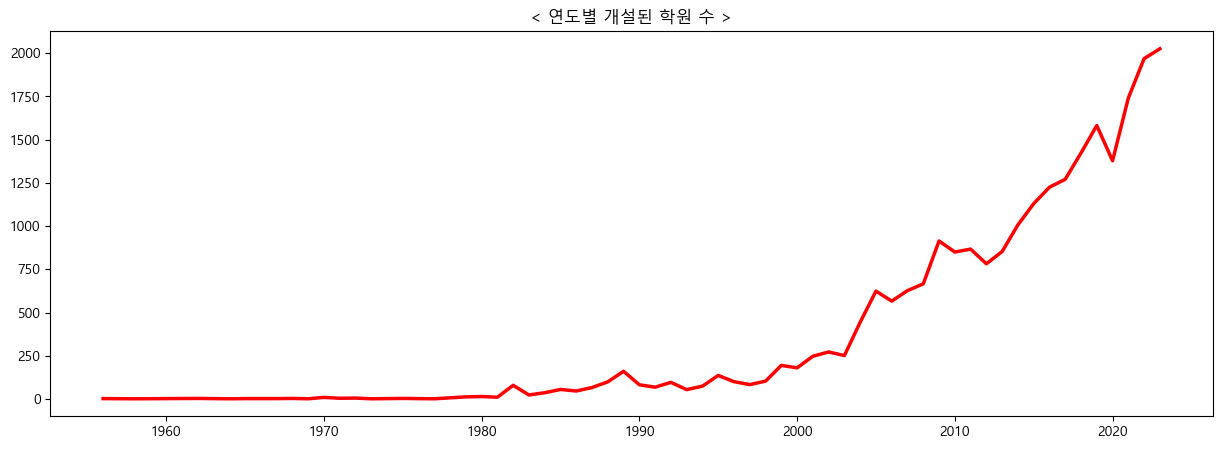

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

dfdf = df['개설년도'].value_counts().sort_index().to_frame().reset_index()
_=sns.lineplot(data = dfdf,
               x = '개설년도', y='count',
               ax=ax, linewidth=2.5, color='red')
_=plt.xlabel('')
_=plt.ylabel('')
_=plt.title("< 연도별 개설된 학원 수 >")

# 2020년(코로나) 이후 개설된 학원

In [8]:
df_20s = df.loc[(df['개설년도']>=2020)&(df['개설년도']<=2023)]
print(df_20s.shape)
df_20s.head()

(7114, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
2606,은평구,학원,17740,책나무독서논술학원,서울특별시 은평구 은평로3길 18-1,4층 (역촌동),입시.검정 및 보습,보통교과,"보습,보습?논술",보습,...,Y,N,122903,개원,20230816,NaN,99991231.0,20230816,20240505,2023
5998,강남구,학원,3000010280,에듀파크학원,서울특별시 강남구 압구정로46길 5-6,4층 406호,입시.검정 및 보습,NaN,"보습?논술,",NaN,...,Y,N,6018,개원,20230621,NaN,NaN,20230616,20231018,2023
5999,광진구,학원,3000010282,위드학원,서울특별시 광진구 천호대로 608,2층 201호,입시.검정 및 보습,NaN,"보습,",NaN,...,Y,N,4987,개원,20230621,NaN,NaN,20230621,20231018,2023
6003,노원구,교습소,3000010299,소아베피아노교습소,서울특별시 노원구 공릉로34길 86,111호,예능(대),NaN,NaN,NaN,...,Y,NaN,1817,개원,20230616,NaN,NaN,20230616,20240225,2023
6007,도봉구,교습소,3000010310,한우리독서토론논술방학한화논술교습소,서울특별시 도봉구 방학로 187,"203호(방학동, 한화아파트상가동)",입시.검정 및 보습,NaN,어휘,NaN,...,Y,NaN,1383,개원,20230616,NaN,NaN,20230616,20231018,2023


## 교습계열별 학원 수

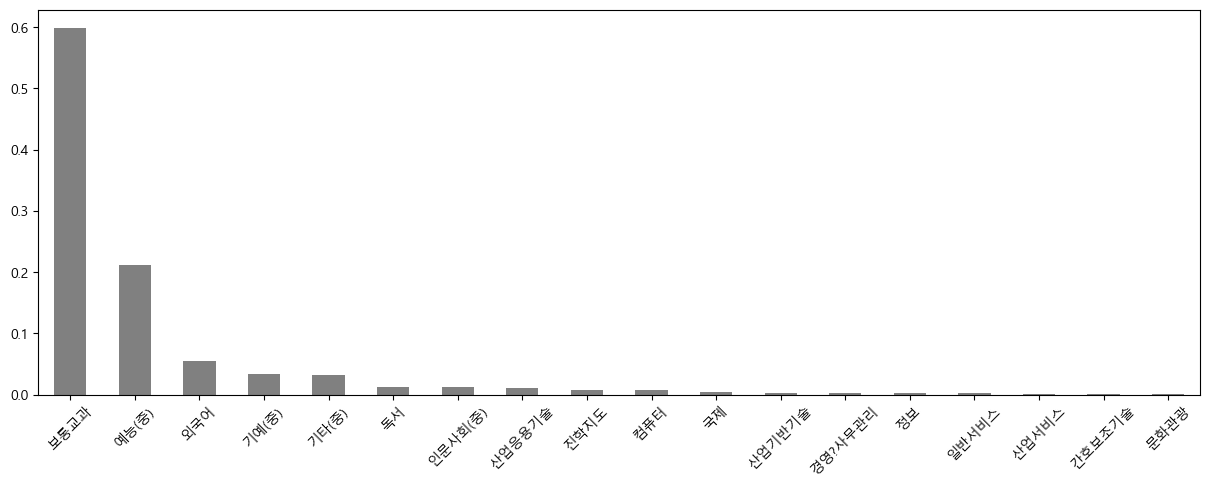

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
_=df_20s['교습계열명'].value_counts(normalize=True).plot.bar(color='grey')
_= plt.xticks(rotation=45)
_= plt.xlabel("")

# 컴퓨터 학원

In [11]:
com_df = df.loc[df['교습계열명']=="컴퓨터"]

print(com_df.shape)
com_df.head()

(127, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
78,마포구,학원,1000003668,중앙정보처리학원,서울특별시 마포구 신촌로 176,", 4층일부(401,402호),6층 (대흥동)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어),","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,4104,개원,19701230,NaN,99991231.0,19701230,20231018,1970
113,서대문구,학원,1000005850,국제컴퓨터학원,서울특별시 서대문구 통일로 157-6,", 3층 (냉천동213)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어)","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,120050,개원,19900509,NaN,99991231.0,19900509,20231018,1990
197,은평구,학원,1000009111,은평컴퓨터아트학원,서울특별시 은평구 연서로 131,4층 (구산동),직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어)","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,122819,개원,20020116,NaN,99991231.0,20020116,20240428,2002
217,영등포구,학원,1000010085,신중앙컴퓨터학원,서울특별시 영등포구 신길로 172,", 2층 일부 (신길동)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어),","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,7362,개원,19860111,NaN,99991231.0,19860111,20231029,1986
278,구로구,학원,1000012864,신청산컴퓨터학원,서울특별시 구로구 경인로 338,", 2층 (개봉동)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어),","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,152806,개원,19960520,NaN,99991231.0,19960520,20231029,1996


## 연도별 개설 학원 수

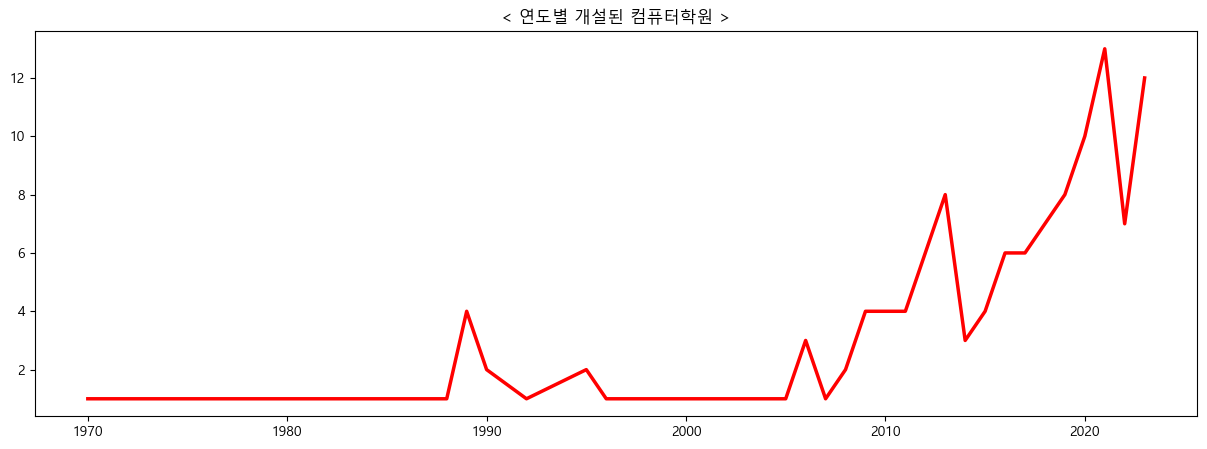

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
_=com_df['개설년도'].value_counts().sort_index().plot.line(color='red', linewidth=2.5)

_=plt.title("< 연도별 개설된 컴퓨터학원 >")
_=plt.xlabel("")

## '구'별 학원 수

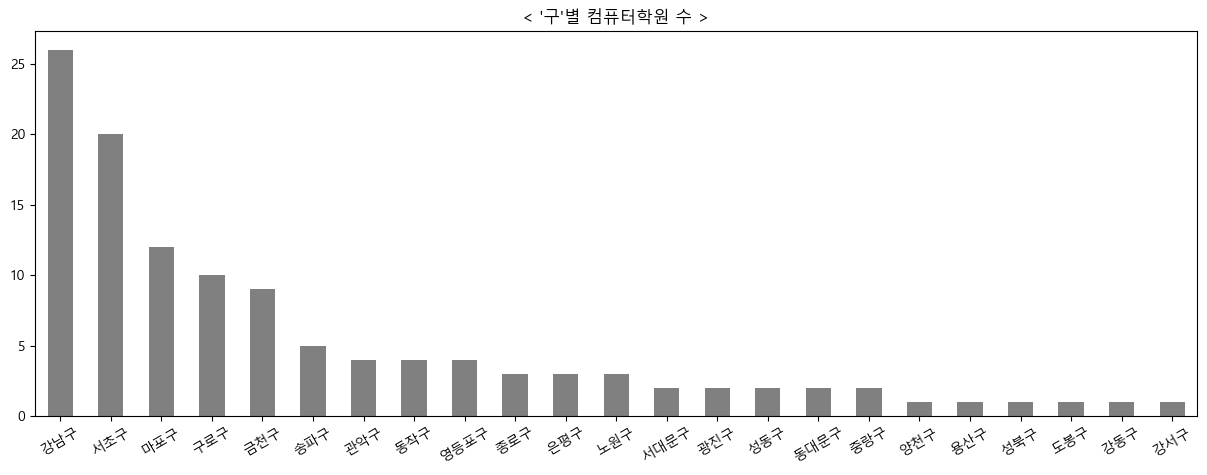

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
_=com_df['행정구역명'].value_counts().plot.bar(color='grey')
_=plt.xticks(rotation=30)
_=plt.xlabel("")
_=plt.title("< '구'별 컴퓨터학원 수 >")

# 천재그룹 산하 학원

In [15]:
hb_df = df.loc[(df['학원명'].str.contains('해법'))|(df['학원명'].str.contains('천재'))]
hb_df.reset_index(inplace=True, drop=True)

print(hb_df.shape)
hb_df.head()

(390, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,서대문구,학원,1000008872,스마트해법수학해법영어홍제원학원,서울특별시 서대문구 통일로34길 28-6,", 2층 (홍제동)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,120854,개원,20001130,NaN,99991231.0,20001130,20240707,2000
1,구로구,학원,1000012603,해법학원,서울특별시 구로구 구로동로42길 56,", 2층 (구로동)",입시.검정 및 보습,보통교과,NaN,보습,...,Y,N,8280,개원,19951012,NaN,99991231.0,19951012,20241006,1995
2,강남구,학원,1000035422,해법수학해법영어학원,서울특별시 강남구 개포로22길 84,", 3층 (개포동)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,135961,개원,19891106,NaN,99991231.0,19891106,20231224,1989
3,강남구,학원,1000035995,해법수학교실대치학원,서울특별시 강남구 도곡로 447,", 5층 (대치동,제일빌딩)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,135999,개원,19980720,NaN,99991231.0,19980720,20240908,1998
4,강남구,학원,1000036477,청담해법수학학원,서울특별시 강남구 학동로 419,", 3층 (청담동,대륭빌딩)",입시.검정 및 보습,보통교과,"보습,",보습,...,Y,N,135951,개원,20010525,NaN,99991231.0,20010525,20231018,2001


## '구'별 학원 수

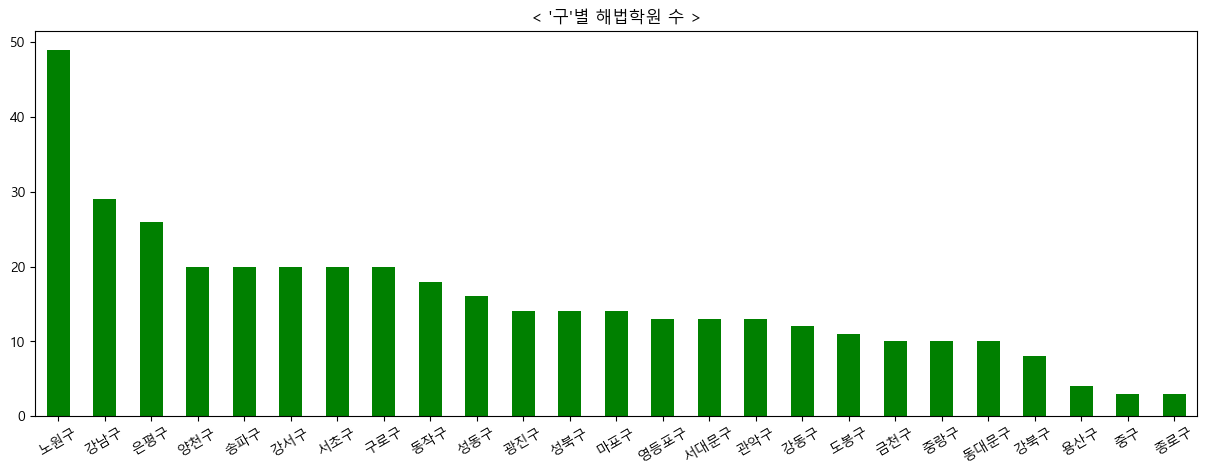

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
_= hb_df['행정구역명'].value_counts().plot.bar(color = 'green')
_= plt.xticks(rotation=30)
_= plt.xlabel("")
_= plt.title("< '구'별 해법학원 수 >")

## 분야별 학원 수

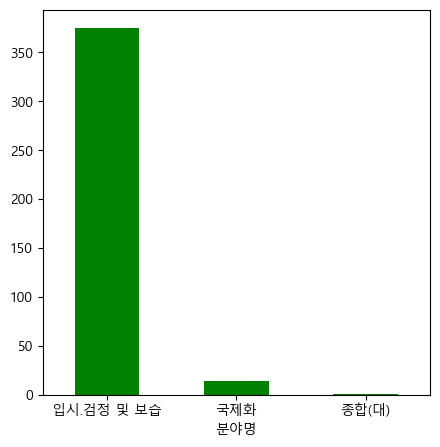

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
_=hb_df['분야명'].value_counts().plot.bar(color='green', ax=ax)
_= plt.xticks(rotation=0)

## 연도별 개설 학원 수

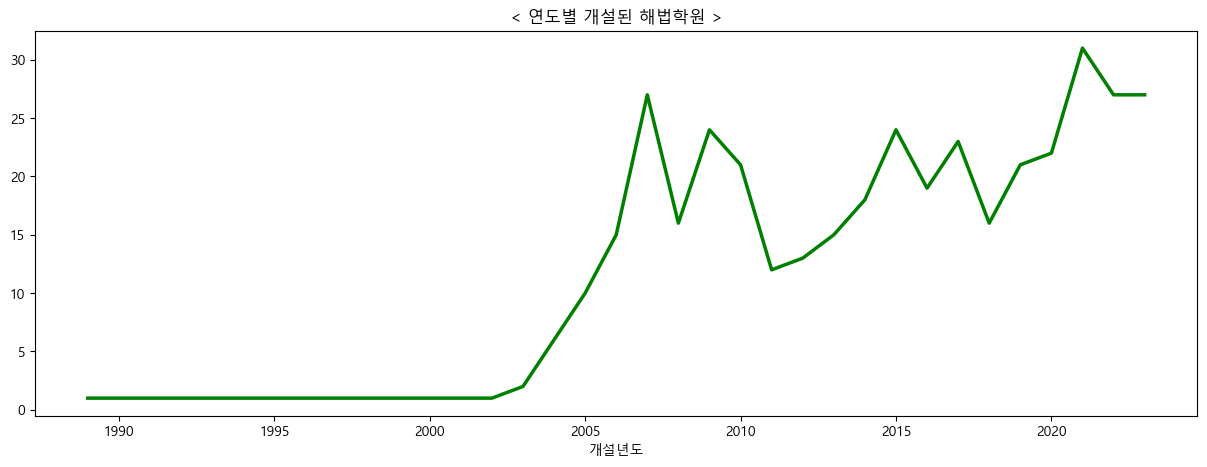

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
_=hb_df['개설년도'].value_counts().sort_index().plot.line(color='green', linewidth=2.5)
_=plt.title("< 연도별 개설된 해법학원 >")